# *ANN -Artificial Neural Network*

### *Analysis objective :<br>Applying -ANN- model on the prediction of -gender- as a target Feature*
---

In [83]:
import pandas as pd
from matplotlib import pyplot  as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
matplotlib.rcParams["figure.figsize"]=(20,10)
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
LabelEncoder_category=LabelEncoder()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import (r2_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix)
import warnings
from sklearn.utils.multiclass import unique_labels
import seaborn as sns

In [42]:
df=pd.read_csv(r"C:/Users/Omar\Desktop/Omar_Files/Python_Analysis/DeepLearning_ANN/DataSet/data_car.csv")
df=df.drop(["X_OBSTAT_","clm","numclaims"],axis=1)
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0.0,HBACK,3,F,C,2
1,1.03,0.648871,0.0,HBACK,2,F,A,4
2,3.26,0.569473,0.0,UTE,2,F,E,2
3,4.14,0.317591,0.0,STNWG,2,F,D,2
4,0.72,0.648871,0.0,HBACK,4,F,C,2


In [43]:
df=df.sort_values(by=['veh_age', 'agecat','area','gender']).reset_index().drop("index",axis=1)
df.head()

,veh_value,exposure,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.59,0.229979,0.0,SEDAN,1,F,A,1
1,1.46,0.221766,0.0,HBACK,1,F,A,1
2,1.54,0.238193,0.0,SEDAN,1,F,A,1
3,1.57,0.522930,0.0,SEDAN,1,F,A,1
4,1.41,0.219028,0.0,HBACK,1,F,A,1


---

In [44]:

categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

print("we have {} numerical features : {}\n".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 3 numerical features : ['veh_value', 'exposure', 'claimcst0']

we have 5 categorical features : ['veh_body', 'veh_age', 'gender', 'area', 'agecat']


In [45]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [46]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 0 discrete feature : []

we have 3 countinuous feature : ['veh_value', 'exposure', 'claimcst0']


In [47]:
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

In [48]:
x=df.drop("gender",axis=1)
y=df["gender"]

In [49]:
x[countinuous_feature].skew(axis=0,skipna=True)

veh_value     2.968022
exposure      0.175557
claimcst0    17.502503
dtype: float64

In [50]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
transform_features=['veh_value']
df[transform_features]=pt.fit_transform(x[transform_features])

In [51]:
df[transform_features].skew(axis=0,skipna=True)

veh_value    0.010369
dtype: float64

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
sc=StandardScaler()
preprocessor=ColumnTransformer([
    ("StandardScaler",sc,x.columns)
]
)

In [53]:
x=preprocessor.fit_transform(x)

In [54]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy="minority")
x_re,y_res=smt.fit_resample(x,y)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_re,y_res ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (16640, 7) and Y = (16640,) : 
Test data shape of X = (4161, 7) and Y = (4161,) : 


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

* *Importing Tensorflow :*

In [56]:
import tensorflow as tf

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU
from tensorflow.keras.layers import Dropout

* *Model Preparation :*

In [58]:
classifier=Sequential()

* *1st Hidden Layer :*

In [59]:
classifier.add(Dense(units=7,activation="ReLU"))

* *2nd Hidden Layer :*

In [60]:
classifier.add(Dense(units=14,activation="ReLU"))

* *Last Layer -Output :*

In [61]:
classifier.add(Dense(1,activation="sigmoid"))

* *Adam Optimizer Preparation :*

In [62]:
import tensorflow
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

* *Compiling the Model :*

In [63]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

* *Early Stopping Preparation :*

In [64]:
import tensorflow
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

* *Model Fitting :*

In [65]:
model_history=classifier.fit(x_train,y_train,validation_split=.33,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
349/349 [==============================] - 2s 3ms/step - loss: 0.5079 - accuracy: 0.7479 - val_loss: 0.4604 - val_accuracy: 0.7875
Epoch 2/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4628 - accuracy: 0.7807 - val_loss: 0.4564 - val_accuracy: 0.7833
Epoch 3/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.7882 - val_loss: 0.4519 - val_accuracy: 0.7986
Epoch 4/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.7903 - val_loss: 0.4431 - val_accuracy: 0.7952
Epoch 5/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7935 - val_loss: 0.4486 - val_accuracy: 0.7983
Epoch 6/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7947 - val_loss: 0.4453 - val_accuracy: 0.7961
Epoch 7/1000
349/349 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.7962 - val_loss: 0.4379 - val_accuracy:

In [75]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

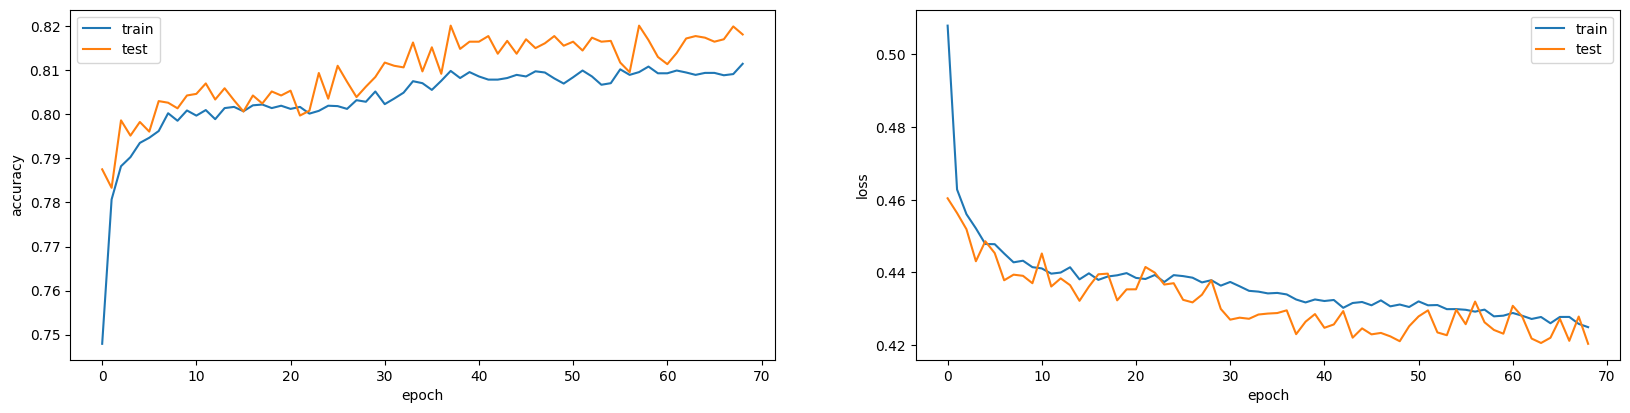

In [76]:
plt.subplot(221)
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"]);


plt.subplot(222)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"]);

In [77]:
y=classifier.predict(x_test)

131/131 [==============================] - 0s 1ms/step


In [78]:
y=y>.5

In [79]:
confusion_matrix(y_test,y)

array([[1644,  272],
       [ 541, 1704]], dtype=int64)

In [80]:
accuracy_score(y_test,y)

0.8046142754145638

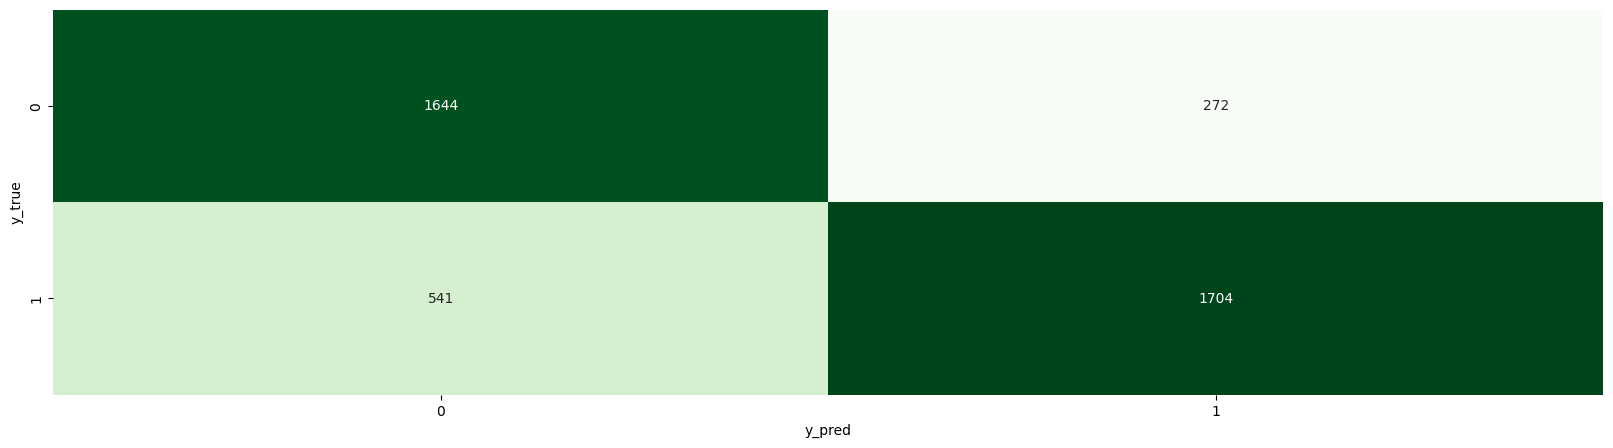

In [86]:
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.heatmap(confusion_matrix(y_test,y),annot = True,cmap="Greens", fmt = ".0f",cbar=False)
plt.xlabel("y_pred")
plt.ylabel("y_true");

In [87]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1916
           1       0.86      0.76      0.81      2245

    accuracy                           0.80      4161
   macro avg       0.81      0.81      0.80      4161
weighted avg       0.81      0.80      0.80      4161



In [88]:
import pickle
with open ("gender_prediction_model.pkl","wb") as f:
    pickle.dump(classifier,f)

In [93]:
df.columns

Index(['veh_value', 'exposure', 'claimcst0', 'veh_body', 'veh_age', 'gender',
       'area', 'agecat'],
      dtype='object')

In [96]:
classifier.predict([[10000,.9,14000,2,4,3,3]])

1/1 [==============================] - 0s 56ms/step


array([[1.]], dtype=float32)

In [98]:
classifier.predict(x_test)

131/131 [==============================] - 0s 1ms/step


array([[0.957271  ],
       [0.9170916 ],
       [0.7780128 ],
       ...,
       [0.7921247 ],
       [0.14153078],
       [0.96308047]], dtype=float32)

---